In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

from pykdf.kdf import save_kdf, load_kdf
from fakespikes.rates import bursts, constant
from fakespikes.neurons import Spikes
import fakespikes.util as sp
import numpy as np

import seaborn as sns
sns.set_style('ticks')

In [14]:
# %run ../exp/fig1.py ../data/fig1

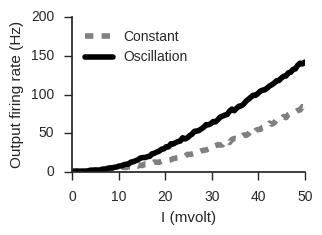

In [15]:
# -----------------------------------------------------------------------------------
# FI with fixed background
res_a = load_kdf('../data/fig1/a.hdf5')

fi1 = res_a['fi1']
fi2 = res_a['fi2']
Is = res_a['Is'] * 1000
v1 = res_a['v1']
v2 = res_a['v2']
ge1 = res_a['ge1']
ge2 = res_a['ge2']
gi1 = res_a['gi1']
gi2 = res_a['gi2']

plt.figure(figsize=(3, 2))
plt.plot(Is, fi1, label='Constant', color='grey', linewidth=4, linestyle="--")
plt.plot(Is, fi2, label='Oscillation', color='k', linewidth=4)
plt.xlabel("I (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.ylim(0, 200)
plt.legend(loc='bottom right')
sns.despine()

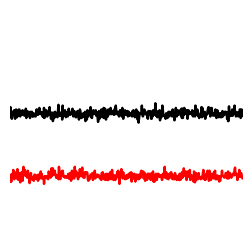

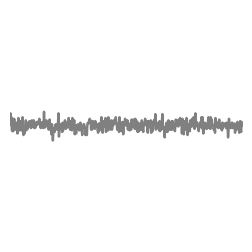

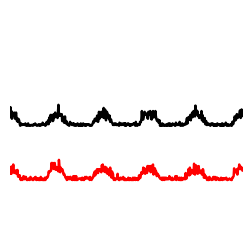

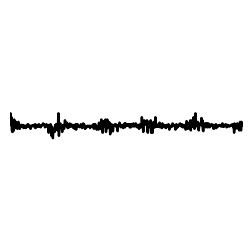

In [16]:

nrns_e = Spikes(125, 0.5, dt=1e-3, seed=42)
nrns_i = Spikes(125, 0.5, dt=1e-3, seed=42+1)

times = nrns_e.times
r = 125
r_fix = constant(times, r)
r_osc = bursts(times, r, 10, None, min_a=12)
    
f_e = nrns_e.poisson(r_fix).sum(1)
f_i = nrns_i.poisson(r_fix).sum(1)

o_e = nrns_e.poisson(r_osc).sum(1)
o_i = nrns_i.poisson(r_osc).sum(1)

plt.figure(figsize=(3, 3))
sub = plt.subplot(111)
plt.plot(times, f_e, color='k')
plt.plot(times, f_i-80, color='r')
plt.ylim(-150, 150)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)

plt.figure(figsize=(3, 3))
plt.plot(times, f_e - f_i, color='grey')
plt.ylim(-150, 150)
sub = plt.subplot(111)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)


plt.figure(figsize=(3, 3))
sub = plt.subplot(111)
plt.plot(times, o_e, color='k')
plt.plot(times, o_i-70, color='r')
plt.ylim(-150, 150)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)

plt.figure(figsize=(3, 3))
plt.plot(times, o_e-o_i, color='k')
plt.ylim(-150, 150)
sub = plt.subplot(111)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)

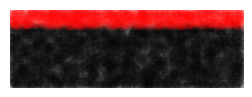

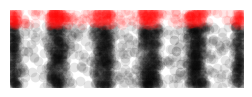

In [17]:

nrns_e = Spikes(80, 0.5, dt=1e-3, seed=42)
nrns_i = Spikes(20, 0.5, dt=1e-3, seed=42+1)

times = nrns_e.times
r = 125
r_fix = constant(times, r)
r_osc = bursts(times, r, 10, None, min_a=12)
    
ns_fe, ts_fe = sp.to_spiketimes(times, nrns_e.poisson(r_fix))
ns_fi, ts_fi = sp.to_spiketimes(times, nrns_i.poisson(r_fix))

ns_oe, ts_oe = sp.to_spiketimes(times, nrns_e.poisson(r_osc))
ns_oi, ts_oi = sp.to_spiketimes(times, nrns_i.poisson(r_osc))

plt.figure(figsize=(3, 1))
sub = plt.subplot(111)
plt.plot(ts_fe, ns_fe, 'ok', alpha=0.1)
plt.plot(ts_fi, ns_fi + 80, 'or', alpha=0.1)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)

plt.figure(figsize=(3, 1))
sub = plt.subplot(111)
plt.plot(ts_oe, ns_oe, 'ok', alpha=0.1)
plt.plot(ts_oi, ns_oi + 80, 'or', alpha=0.1)
sub.set_frame_on(False)
sub.get_yaxis().set_visible(False)
sub.get_xaxis().set_visible(False)


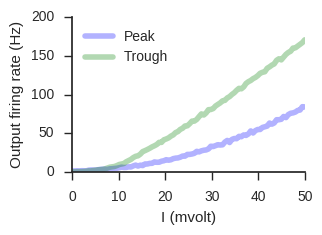

In [18]:
# -----------------------------------------------------------------------------------
# FI with fixed background
res_a = load_kdf('../data/fig1/b.hdf5')

fi1 = res_a['fi1']
fi2 = res_a['fi2']
Is = res_a['Is'] * 1000

plt.figure(figsize=(3, 2))
plt.plot(Is, fi1, label='Peak', color='b', linewidth=4, alpha=0.3)
plt.plot(Is, fi2, label='Trough', color='g', linewidth=4, alpha=0.3)
plt.xlabel("I (mvolt)")
plt.ylabel("Output firing rate (Hz)")
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.legend(loc='upper left')

sns.despine()

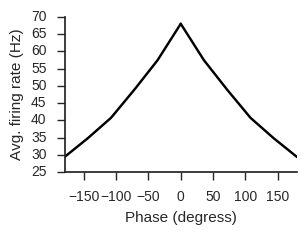

In [19]:
phases = res_a['phases']
fi_phase = res_a['fi_phase']

plt.figure(figsize=(3, 2))
plt.plot(phases, fi_phase, color='black')
plt.plot(-phases, fi_phase, color='black')
plt.xlabel("Phase (degress)")
plt.ylabel("Avg. firing rate (Hz)")
plt.xlim(-180, 180)
sns.despine()

In [20]:
np.roll(phases, 3)

array([ 108.,  144.,  180.,    0.,   36.,   72.])